In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wordcloud
import re
from wordcloud import WordCloud, STOPWORDS
from matplotlib.pyplot import savefig
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [125]:
df = pd.read_csv('51jobs.csv')
df = df.dropna(how='any')
df.head()
df2 = df.welfare.values
for i in df2:
    if not i:
        continue
    else:
        with open('51jobs.txt','a',encoding='utf-8') as f:
            f.write(i)

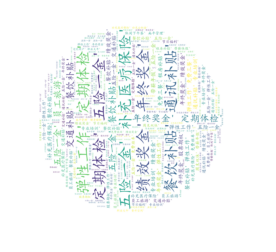

In [7]:
text = open('51jobs.txt',encoding='utf-8').read()
x, y = np.ogrid[:1200, :1200]

mask = (x - 600) ** 2 + (y - 500) ** 2 > 520 ** 2
mask = 255 * mask.astype(int)


wc = WordCloud(background_color="white", 
               repeat=True, mask=mask,
               font_path=r'C:\Windows\Fonts\simkai.ttf'
              ,mode="RGBA" )
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
savefig(r'C:\Users\48170\Desktop\51jobs.png',dpi=600)
plt.show()

In [69]:
df.head()

,job,company_name,work_address,work_experience,edu_bgd,re_num,release_time,company_type,company_scale,company_area,pay,welfare,position_info,Work_loca
0,python爬虫工程师,北京法宣在线科技有限公司,北京-海淀区,3-4年经验,大专,招1人,12-07发布,民营公司,50-150人,计算机服务(系统、数据服务、维修),1.5-2万/月,"['五险一金', '餐饮补贴', '弹性工作', '定期体检', '员工旅游', '绩效奖金...",['岗位职责：1、负责能力平台管理后台的设计与研发；2、与团队一起构建高并发、高可用的分布式...,上班地址：北京市海淀区北京市海淀区北三环西路32号恒润国际大厦0902室
1,Python讲师,北京智联友道科技有限公司,北京-海淀区,2年经验,本科,招2人,12-07发布,民营公司,500-1000人,"教育/培训/院校,互联网/电子商务",1.5-2万/月,"['五险一金', '交通补贴', '餐饮补贴', '专业培训', '年终奖金']",['岗位职责：1、卓有成效的码工，富有情怀的讲师。根据 Python 教学大纲，制定教学内容...,上班地址：北京市海淀区北清路与稻香湖路交汇处绿地中央广场15号楼六层
3,python开发工程师,杭州迪普科技股份有限公司,北京-海淀区,无工作经验,本科,招若干人,12-07发布,民营公司,1000-5000人,通信/电信/网络设备,10-20万/年,"['五险一金', '定期体检', '弹性工作']",['\r岗位职责：1、参与公司云平台产品（基于OpenStack）的系统研发；2、根据开发计...,上班地址：北清路68号用友软件园培训中心二期北区17号楼4层
5,JAVA/Python开发工程师(3691),完美世界（北京）总部/完美时空,北京,无工作经验,本科,招1人,12-07发布,外资（欧美）,500-1000人,网络游戏,1.5-2万/月,"['五险一金', '补充医疗保险', '年终奖金']",['\r\xa0岗位职责：1.负责安全系统后端开发工作。职责要求：1.3年及以上java/p...,上班地址：北京市朝阳区北苑路86号院306号完美世界大厦
7,Python中高级开发工程师,新浪微博,北京,1年经验,本科,招5人,12-07发布,民营公司,500-1000人,互联网/电子商务,2-3.5万/月,"['免费班车', '五险一金', '年底双薪', '餐补', '带薪年假', '弹性工作',...",['工作职责 1、构建微博动态属性、用户动态属性的实时存储和分析系统 2、负责热...,上班地址：北京市海淀区西北旺东路10号院西区8号楼新浪总部大厦


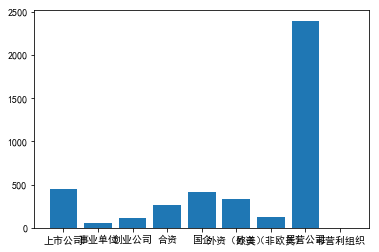

In [68]:
df3 = df.groupby('company_type')['job'].count()#企业类型数量
x = np.arange(9)
plt.xticks(x,df3.index)
plt.bar(x,df3.values)
plt.show()

# 薪资分布问题

In [126]:
pay = []
for i in df.pay:#1.5-2万/月  i[:-3]
    if i[-3:] == '万/月':
        a = ''
        for x in i[:-3].split('-'):
            a = a+str(round(float(x)*10,1))+'-'
        a = a[:-1]
        a = a+'千/月'
        pay.append(a)
    elif i[-3:] == '万/年':
        a=''
        for x in i[:-3].split('-'):
            a = a+str(round(float(x)*10/12,1))+'-'
        a = a[:-1]
        a = a+'千/月'
        pay.append(a)
    else:
        pay.append(i)
len(pay)
df.pay = pay
print(df.pay)

            

0       15.0-20.0千/月
1       15.0-20.0千/月
3        8.3-16.7千/月
5       15.0-20.0千/月
7       20.0-35.0千/月
10      10.0-20.0千/月
11       8.0-10.0千/月
12      20.0-25.0千/月
13      20.0-40.0千/月
14      15.0-20.0千/月
15      10.0-20.0千/月
16      15.0-20.0千/月
17      20.0-45.0千/月
18      25.0-40.0千/月
19      15.0-30.0千/月
20      15.0-30.0千/月
21      25.0-30.0千/月
23      10.0-16.0千/月
24      20.0-40.0千/月
28      10.0-20.0千/月
29      20.0-25.0千/月
30      10.0-15.0千/月
31       8.0-20.0千/月
32       5.8-10.0千/月
33      15.0-20.0千/月
34      15.0-19.0千/月
35      20.0-30.0千/月
36      10.0-15.0千/月
39      15.0-30.0千/月
41      15.0-25.0千/月
            ...     
5622          100元/天
5627    50.0-70.0千/月
5628    50.0-70.0千/月
5630    50.0-70.0千/月
5631          5-8千/月
5632        1.5千以下/月
5633        3-4.5千/月
5634    15.0-20.0千/月
5638    15.0-25.0千/月
5639    10.0-15.0千/月
5644     6.0-12.0千/月
5647     8.0-13.0千/月
5648    30.0-60.0千/月
5649    30.0-60.0千/月
5650     6.0-10.0千/月
5651    15.0-25.0千/月
5652        4

In [98]:
df

,job,company_name,work_address,work_experience,edu_bgd,re_num,release_time,company_type,company_scale,company_area,pay,welfare,position_info,Work_loca
0,python爬虫工程师,北京法宣在线科技有限公司,北京-海淀区,3-4年经验,大专,招1人,12-07发布,民营公司,50-150人,计算机服务(系统、数据服务、维修),15.0-20.0千/月,"['五险一金', '餐饮补贴', '弹性工作', '定期体检', '员工旅游', '绩效奖金...",['岗位职责：1、负责能力平台管理后台的设计与研发；2、与团队一起构建高并发、高可用的分布式...,上班地址：北京市海淀区北京市海淀区北三环西路32号恒润国际大厦0902室
1,Python讲师,北京智联友道科技有限公司,北京-海淀区,2年经验,本科,招2人,12-07发布,民营公司,500-1000人,"教育/培训/院校,互联网/电子商务",15.0-20.0千/月,"['五险一金', '交通补贴', '餐饮补贴', '专业培训', '年终奖金']",['岗位职责：1、卓有成效的码工，富有情怀的讲师。根据 Python 教学大纲，制定教学内容...,上班地址：北京市海淀区北清路与稻香湖路交汇处绿地中央广场15号楼六层
3,python开发工程师,杭州迪普科技股份有限公司,北京-海淀区,无工作经验,本科,招若干人,12-07发布,民营公司,1000-5000人,通信/电信/网络设备,8.3-16.7千/月,"['五险一金', '定期体检', '弹性工作']",['\r岗位职责：1、参与公司云平台产品（基于OpenStack）的系统研发；2、根据开发计...,上班地址：北清路68号用友软件园培训中心二期北区17号楼4层
5,JAVA/Python开发工程师(3691),完美世界（北京）总部/完美时空,北京,无工作经验,本科,招1人,12-07发布,外资（欧美）,500-1000人,网络游戏,15.0-20.0千/月,"['五险一金', '补充医疗保险', '年终奖金']",['\r\xa0岗位职责：1.负责安全系统后端开发工作。职责要求：1.3年及以上java/p...,上班地址：北京市朝阳区北苑路86号院306号完美世界大厦
7,Python中高级开发工程师,新浪微博,北京,1年经验,本科,招5人,12-07发布,民营公司,500-1000人,互联网/电子商务,20.0-35.0千/月,"['免费班车', '五险一金', '年底双薪', '餐补', '带薪年假', '弹性工作',...",['工作职责 1、构建微博动态属性、用户动态属性的实时存储和分析系统 2、负责热...,上班地址：北京市海淀区西北旺东路10号院西区8号楼新浪总部大厦
10,Python开发,亚信科技（中国）有限公司,北京-海淀区,2年经验,本科,招1人,12-07发布,外资（欧美）,10000人以上,"计算机软件,通信/电信运营、增值服务",10.0-20.0千/月,[],['工作职责：1、监控平台、IT服务管理系统的二次开发和运维2、PaaS平台的二次开发和运维...,上班地址：北京海淀区中关村软件园二期西北旺东路10号亚信大厦
11,Python开发工程师(石家庄）,北京慧铭软件有限公司,石家庄,3-4年经验,大专,招2人,12-07发布,民营公司,少于50人,计算机软件,8.0-10.0千/月,"['五险一金', '餐饮补贴', '专业培训', '绩效奖金', '年终奖金', '弹性工作']",['Python 岗位职责：1、 负责运维自动化、监控、数据分析平台的开发工作；2、 根据开...,上班地址：河北省石家庄市裕华区昆仑大街89号中国移动通信
12,Python高级开发工程师,南京高泰科技有限公司,北京-石景山区,5-7年经验,本科,招1人,12-07发布,民营公司,50-150人,"计算机软件,计算机服务(系统、数据服务、维修)",20.0-25.0千/月,"['五险一金', '员工旅游', '餐饮补贴', '通讯补贴', '定期体检', '周末双休...",['1. 5年以上开发经验，基本功扎实，精通Java；2. ...,上班地址：北京市石景山区苹果园街道八大处路45号点石商务公园8号楼7楼
13,Python开发工程师,进化时代科技（北京）有限责任公司,北京-海淀区,3-4年经验,硕士,招若干人,12-07发布,民营公司,少于50人,金融/投资/证券,20.0-40.0千/月,"['绩效奖金', '年终奖金', '弹性工作', '出国机会', '七险一金', '股票期权...",['【岗位职责】：\xa01.在做市商及AI量化交易模拟、回测、实盘系统搭建中，负责相关功能...,上班地址：信息路18号上地创新大厦3层3049
14,Python开发工程师,中国广视索福瑞媒介研究有限责任公司,北京-朝阳区,3-4年经验,本科,招若干人,12-07发布,合资,500-1000人,专业服务(咨询、人力资源、财会),15.0-20.0千/月,"['五险一金', '定期体检']",[' **工作职责** 1 Web系统开发和维护； 2 大数据处理和分析； 3 参与维护已有...,上班地址：建国路甲92号世茂大厦24层


In [106]:
welfare = []
for i in df.welfare:
    welfare.append((str(i).replace('[','').replace(']','')))
df.welfare = welfare    

In [108]:
np.bincount?

In [152]:
a = []
for i in df.pay:
    for x in i[:-3].split('-'):
        if x[-6:] == '万元以下/月':
            x = float(x[:-5])*10
        if x[-5:] == '千以下/月':
            x = x[:-5]
            a.append(eval(x))
        if x[-1:] == '元':
            x = float(x[:-1])/1000*30
        if x[-2:] == '千以':
            x = x[:-2]
            a.append(eval(x))
        else:
            a.append(eval(x))
np.bincount(a)
        
    
        




TypeError: 'float' object is not subscriptable

In [130]:
np.bin

array([0, 1], dtype=int64)